### Use the Machine Learning algorithm Decision Tree, and the gbm_tsn.csv database to evaluate classification performance of:

a) Immune cells in the core and periphery of the tumor

b) Neoplastic cells in the core and periphery of the tumor



### I apply the following **five** steps:

1) Seperate Immune cell and Neoplastic cell first in column F4.

2) Apply deicison tree to the dataset. Check model accuracy.

3) Solve imbalance data issue. Check model accuracy. 

4) Optimize the model after solved imbalance data issue in 3. Check model accuracy.

5) Compare the final metrics and compare the 3 model accuracy. 

In [1]:
#Standard
import pandas as pd
import numpy as np

#Visualizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Metrics Additional
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier #Model I will be using today
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Feature Selection
import lightgbm as lgb

#Sampling
from sklearn.utils import resample

#Tuning
from sklearn.model_selection import GridSearchCV

#Others
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/gbm_tsn.csv')
df

,F1,F2,Class,F3,F4
0,19.555715,-66.420423,Tumor,BT_S2,Neoplastic
1,-66.467768,-4.840194,Tumor,BT_S2,Oligodendrocyte
2,8.197811,-63.763646,Tumor,BT_S2,Neoplastic
3,-6.468824,-51.283635,Tumor,BT_S2,Neoplastic
4,-9.436247,-53.896430,Tumor,BT_S2,Neoplastic
...,...,...,...,...,...
3584,40.472940,-49.749664,Tumor,BT_S6,Vascular
3585,-12.666931,-3.672656,Tumor,BT_S6,Immune
3586,41.667127,-49.692359,Tumor,BT_S6,Vascular
3587,40.824259,-49.044548,Tumor,BT_S6,Vascular


### Seperate Immune and Neoplastic data for Tumor and Periphery

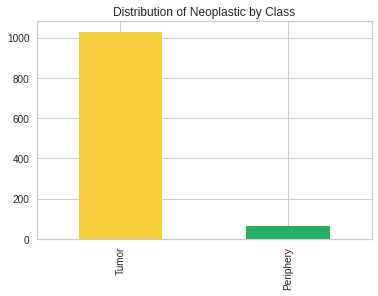

In [3]:
neoplastic = df.loc[df['F4'] == 'Neoplastic']
neoplastic['Class'].value_counts().plot(kind='bar', 
color = ['#F4D03F','#27AE60'], title='Distribution of Neoplastic by Class');

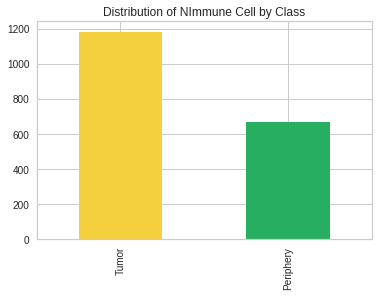

In [32]:
immune = df.loc[df['F4'] == 'Immune']
immune['Class'].value_counts().plot(kind='bar', 
color = ['#F4D03F','#27AE60'], title='Distribution of NImmune Cell by Class');

### Neoplastic Decision Tree Model BEFORE data resample

In [5]:
X = neoplastic.drop(['Class','F3','F4'], axis=1)
y = neoplastic['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

#Fit the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training shape:  (872, 2)
Testing shape:  (219, 2)


In [6]:
# Baseline Neoplastic Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
print(f'Decision tree has {tree .tree_.node_count} nodes with maximum depth {tree .tree_.max_depth}.') 
print(f'Model Accuracy: {tree .score(X_train, y_train)*100}%')
print("Test Data Accuracy: %.2f%%" % (accuracy * 100.0))

Decision tree has 39 nodes with maximum depth 7.
Model Accuracy: 100.0%
Test Data Accuracy: 97.26%


### Neoplastic Decision Tree Model AFTER Data Resample

---



In [7]:
neoplastic['Class'].replace(['Tumor', 'Periphery'],[0, 1], inplace=True)

In [8]:
neoplastic['Class'].value_counts()

0    1029
1      62
Name: Class, dtype: int64

In [9]:
#Tumor is 1029 and Periperhy is 62. There is a imbalance problem in the dataset.So we will need to resample first:

neoplastic_class1 = resample(neoplastic[neoplastic['Class']==0],
               replace=True,
               n_samples=1029,
               random_state=123)

neoplastic_class2 = resample(neoplastic[neoplastic['Class']==1],
               replace=True,
               n_samples=1029,
               random_state=123)

neoplastic = pd.concat([neoplastic_class1, neoplastic_class2])
neoplastic['Class'].value_counts()


0    1029
1    1029
Name: Class, dtype: int64

In [10]:
X = neoplastic.drop(['Class','F3','F4'], axis=1)
y = neoplastic['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

#Fit the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training shape:  (1646, 2)
Testing shape:  (412, 2)


In [11]:
# Neoplastic Model AFTER resampling
tree_resample = DecisionTreeClassifier()
tree_resample.fit(X_train, y_train)
y_pred_resample = tree_resample.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_resample) 
print(f'Decision tree has {tree_resample .tree_.node_count} nodes with maximum depth {tree_resample .tree_.max_depth}.') 
print(f'Model Accuracy: {tree_resample .score(X_train, y_train)*100}%')
print("Test Data Accuracy: %.2f%%" % (accuracy * 100.0))

Decision tree has 41 nodes with maximum depth 7.
Model Accuracy: 100.0%
Test Data Accuracy: 99.27%


### Neoplastic Decision Tree Model AFTER Data Resample + Parameter Optimization

In [12]:
param_grid = { 'max_depth': range(1,25), 'min_samples_leaf': range(1,25), 
               'max_leaf_nodes': range(5,50)}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)

gs_dt = gs_dt.fit(X_train, y_train)

In [13]:
gs_dt.best_params_

{'max_depth': 8, 'max_leaf_nodes': 19, 'min_samples_leaf': 1}

In [14]:
# Neoplastic Model AFTER resampling + using best param
tree_resample_opt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, max_leaf_nodes=19)
tree_resample_opt.fit(X_train, y_train)
y_pred_resample_opt = tree_resample.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_resample_opt) 
print(f'Model Accuracy: {tree_resample_opt .score(X_train, y_train)*100}%')
print("Test Data Accuracy: %.2f%%" % (accuracy * 100.0))

Model Accuracy: 99.87849331713244%
Test Data Accuracy: 99.27%


### Neoplastic Decision Tree Final Metrics and Summary


In [21]:
from sklearn.metrics import average_precision_score

df_result_resample_opt = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_resample_opt).ravel()
accuracy = accuracy_score(y_test, y_pred_resample_opt)
precision = precision_score(y_test, y_pred_resample_opt)
recall = recall_score(y_test, y_pred_resample_opt)
f1 = f1_score(y_test,y_pred_resample_opt)
roc_auc = roc_auc_score(y_test, y_pred_resample_opt)
avg_precision = average_precision_score(y_test, y_pred_resample_opt)

row = {'model': 'Neoplastic_Resample_Opt',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }

df_result_resample_opt = df_result_resample_opt.append(row, ignore_index=True)
df_result_resample_opt

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,Neoplastic_Resample_Opt,206,203,3,0,409,3,0.993,0.986,1.0,0.993,0.993,0.986


## The NEOPLASTIC decision model improved from 97.25% to 99.27% after fixing data imbalance problem. However, model didn't improve further after parameter optimization after data imbalance. Therefore, just resample the data is sufficient to maxmize model accuracy. In the final result, an optimized model after data resample correctly predicted 409 results and only have 3 incorrect results. Falose positive rate is 3, meaning model predicted tumor, when in reality, it is periphery.


### Immune Decision Tree Model BEFORE Data Resample

In [25]:
X = immune.drop(['Class','F3','F4'], axis=1)
y = immune['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

#Fit the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training shape:  (1477, 2)
Testing shape:  (370, 2)


In [26]:
# Baseline Immune Model
tree_immune = DecisionTreeClassifier()
tree_immune.fit(X_train, y_train)
y_pred_immune = tree_immune.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_immune) 
print(f'Decision tree has {tree_immune .tree_.node_count} nodes with maximum depth {tree_immune .tree_.max_depth}.') 
print(f'Model Accuracy: {tree_immune .score(X_train, y_train)*100}%')
print("Test Data Accuracy: %.2f%%" % (accuracy * 100.0))

Decision tree has 247 nodes with maximum depth 14.
Model Accuracy: 100.0%
Test Data Accuracy: 89.19%


### Immune Decision Tree Model AFTER Data Resample


In [34]:
immune['Class'].replace(['Tumor', 'Periphery'],[0, 1], inplace=True)

In [35]:
immune['Class'].value_counts()

0    1182
1     665
Name: Class, dtype: int64

In [36]:
#Tumor is 1182 and Periperhy is 665. There is a imbalance problem in the dataset.So we will need to resample first:

immune_class1 = resample(immune[immune['Class']==0],
               replace=True,
               n_samples=1182,
               random_state=123)

immune_class2 = resample(immune[immune['Class']==1],
               replace=True,
               n_samples=1182,
               random_state=123)

immune = pd.concat([immune_class1, immune_class2])
immune['Class'].value_counts()

0    1182
1    1182
Name: Class, dtype: int64

In [37]:
X = immune.drop(['Class','F3','F4'], axis=1)
y = immune['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

#Fit the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training shape:  (1891, 2)
Testing shape:  (473, 2)


In [38]:
# Immune Model AFTER resampling
tree_immune_resample = DecisionTreeClassifier()
tree_immune_resample.fit(X_train, y_train)
y_pred_immune_resample = tree_immune_resample.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_immune_resample) 
print(f'Decision tree has {tree_immune_resample .tree_.node_count} nodes with maximum depth {tree_immune_resample .tree_.max_depth}.') 
print(f'Model Accuracy: {tree_immune_resample .score(X_train, y_train)*100}%')
print("Test Data Accuracy: %.2f%%" % (accuracy * 100.0))

Decision tree has 235 nodes with maximum depth 15.
Model Accuracy: 100.0%
Test Data Accuracy: 95.77%


### Immune Decision Tree Model AFTER Data Resample + Parameter Optimization

In [39]:
param_grid = { 'max_depth': range(1,25), 'min_samples_leaf': range(1,25), 
               'max_leaf_nodes': range(5,50)}
gs_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)

gs_dt = gs_dt.fit(X_train, y_train)

In [40]:
gs_dt.best_params_

{'max_depth': 24, 'max_leaf_nodes': 47, 'min_samples_leaf': 1}

In [41]:
# Neoplastic Model AFTER resampling + using best param
tree_immune_resample_opt = DecisionTreeClassifier(max_depth=24, min_samples_leaf=1, max_leaf_nodes=47)
tree_immune_resample_opt.fit(X_train, y_train)
y_pred_immune_resample_opt = tree_immune_resample.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred_immune_resample_opt) 
print(f'Model Accuracy: {tree_immune_resample_opt .score(X_train, y_train)*100}%')
print("Test Data Accuracy: %.2f%%" % (accuracy * 100.0))

Model Accuracy: 96.87995769434163%
Test Data Accuracy: 95.77%


### Immune Decision Tree Final Metrics and Summary

In [42]:
from sklearn.metrics import average_precision_score

df_result_immune_resample_opt = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc','avg_pre'])

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_immune_resample_opt).ravel()
accuracy = accuracy_score(y_test, y_pred_immune_resample_opt)
precision = precision_score(y_test, y_pred_immune_resample_opt)
recall = recall_score(y_test, y_pred_immune_resample_opt)
f1 = f1_score(y_test,y_pred_immune_resample_opt)
roc_auc = roc_auc_score(y_test, y_pred_immune_resample_opt)
avg_precision = average_precision_score(y_test, y_pred_immune_resample_opt)

row = {'model': 'Immune_Resample_Opt',
        'tp': tp,
        'tn': tn,
        'fp': fp,
        'fn': fn,
        'correct': tp+tn,
        'incorrect': fp+fn,
        'accuracy': round(accuracy,3),
        'precision': round(precision,3),
        'recall': round(recall,3),
        'f1': round(f1,3),
        'roc_auc': round(roc_auc,3),
        'avg_pre': round(avg_precision,3),
    }

df_result_immune_resample_opt = df_result_immune_resample_opt.append(row, ignore_index=True)
df_result_immune_resample_opt

,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc,avg_pre
0,Immune_Resample_Opt,226,227,10,10,453,20,0.958,0.958,0.958,0.958,0.958,0.938


## The IMMUNE decision model improved from 89.19% to 95.77% after fixing data imbalance problem. However, model didn't improve further after parameter optimization after data imbalance. Therefore, just resample the data is sufficient to maxmize model accuracy. In the final result, an optimized model after data resample correctly predicted 453 results and have 20 incorrect results. False negative and False positive are the same at 10